In [203]:
suppressMessages(library(tidyverse))
suppressMessages(library(ggplot2))
suppressMessages(library(forecast))
suppressMessages(library(astsa) )
suppressMessages(library(xts))
suppressMessages(library(tseries))
suppressMessages(library(fpp2))
suppressMessages(library(fma))
suppressMessages(library(lubridate))
suppressMessages(library(tidyverse))
suppressMessages(library(TSstudio))
suppressMessages(library(quantmod))
suppressMessages(library(tidyquant))
suppressMessages(library(plotly))
suppressMessages(library(ggplot2))
suppressMessages(library(gridExtra))
suppressMessages(library(tidyverse)  )
suppressMessages(library(lubridate)   )
suppressMessages(library(fpp2)          )
suppressMessages(library(zoo)   )
suppressMessages(library(forecast))
suppressMessages(library(ggplot2))



### Weather

In [204]:
mars_weather_data <- read_csv('../../../data/processed/public_sector/mars_weather_from_widget/mars_weather_from_widget_processed.csv')

dim(mars_weather_ground_temperature)
head(mars_weather_data)

Rows: 3857 Columns: 14
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (2): season, ultraviolet_radiation_current
dbl  (9): curiosity_sol, mars_year, mars_month, solar_longitude_degrees, air...
date (1): earth_date_utc
time (2): sunrise_and_sunset_max, sunrise_and_sunset_min

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 3839    2

curiosity_sol,earth_date_utc,mars_year,mars_month,solar_longitude_degrees,season,air_temperature_max_celsius,air_temperature_min_celsius,ground_temperature_max_celsius,ground_temperature_min_celsius,pressure_current_pascals,sunrise_and_sunset_max,sunrise_and_sunset_min,ultraviolet_radiation_current
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<time>,<time>,<chr>
4081,2024-01-29,37,7,189,autumn,-1,-69,13,-78,730,05:18:00,17:21:00,high
4080,2024-01-28,37,7,188,autumn,-2,-72,14,-78,729,05:18:00,17:21:00,high
4079,2024-01-27,37,7,188,autumn,2,-75,14,-78,729,05:18:00,17:21:00,high
4078,2024-01-26,37,7,187,autumn,3,-73,16,-84,728,05:18:00,17:21:00,high
4077,2024-01-25,37,7,186,autumn,0,-70,15,-75,728,05:18:00,17:20:00,high
4076,2024-01-24,37,7,186,autumn,5,-71,15,-74,726,05:19:00,17:20:00,high


In [205]:
# subset df
mars_weather_ground_temperature <- mars_weather_data %>%
  # calculate the average temperature
  mutate(average_ground_temperature_celsius = (ground_temperature_max_celsius + ground_temperature_min_celsius) / 2) %>%
  filter(earth_date_utc >= as.Date("2012-09-01")) %>%
  select(earth_date_utc, average_ground_temperature_celsius) %>%
  arrange(earth_date_utc)


dim(mars_weather_ground_temperature)
head(mars_weather_ground_temperature)


[1] 3839    2

earth_date_utc,average_ground_temperature_celsius
<date>,<dbl>
2012-09-01,-38.5
2012-09-02,-37.0
2012-09-03,-37.0
2012-09-04,-35.5
2012-09-05,-37.0
2012-09-06,-39.0


In [206]:
mars_weather_ground_temperature_ts <- ts(mars_weather_ground_temperature$average_ground_temperature_celsius, start = decimal_date(ymd("2012-09-01")), frequency = 365.25)
mars_weather_ground_temperature_ts


A Time Series:
   [1] -38.5 -37.0 -37.0 -35.5 -37.0 -39.0    NA -37.5 -36.0 -36.0 -35.5 -35.5
  [13] -35.0 -36.0 -35.5 -35.5 -36.5 -35.5 -36.5 -38.0 -35.0 -34.5 -36.0 -35.5
  [25] -32.5 -35.0 -36.0 -35.0 -33.5 -33.5 -35.0 -35.0 -35.5 -35.5 -36.0 -35.0
  [37] -35.5 -34.5 -35.5 -35.0 -35.5 -34.0 -34.0 -35.0 -34.5 -34.5 -35.0 -35.0
  [49] -35.0 -35.5 -34.0 -34.0 -34.0 -35.0 -34.0 -34.5 -34.5 -34.0 -33.5 -33.0
  [61] -33.0 -33.0 -33.5 -33.0 -32.0 -32.5 -33.5 -32.5 -32.5 -32.0 -32.0 -32.0
  [73] -32.0 -31.0 -32.0 -30.5 -29.0 -30.5 -30.0 -30.0 -30.5 -31.5 -30.5 -31.0
  [85] -30.5 -29.5 -30.5 -30.5 -30.0 -30.5 -30.0 -29.0 -29.5 -29.5 -31.5 -29.5
  [97] -31.5 -30.0 -28.5 -29.5 -32.0 -32.0 -31.5 -31.5 -32.5 -32.0 -32.0 -31.5
 [109] -33.5 -32.0 -33.5 -31.5 -31.5 -31.0 -31.5 -32.0 -32.5 -32.0 -32.0 -31.5
 [121] -32.0 -33.0 -32.5 -33.5 -33.5 -32.0 -31.5 -33.0 -34.0 -33.0 -34.0 -33.0
 [133] -33.0 -33.5 -33.0 -33.0 -32.5 -32.5 -30.5 -32.5 -31.5 -31.5 -31.0 -32.0
 [145] -32.0 -32.5 -32.5 -32.5 -32.0 -32.0 -31.5 -32.0 -32.5 -33.5 -32.0 -32.0
 [157] -31.5 -33.0 -32.5 -32.5 -33.0 -33.0 -32.5 -32.5 -32.5 -32.0    NA    NA
 [169] -31.5 -33.5 -32.0 -33.5    NA    NA    NA -33.0 -32.5 -32.5 -32.5 -32.5
 [181] -32.0 -31.5 -32.5 -33.0 -33.0 -33.5 -34.0 -33.0 -33.0 -33.5 -32.5 -34.0
 [193] -33.5 -34.0 -33.0 -33.5 -32.5 -33.0 -33.5 -33.5 -34.0 -33.5 -33.5 -33.0
 [205] -33.5 -34.0 -34.5 -33.0 -34.0 -34.0 -33.5 -33.5 -35.0 -34.5    NA    NA
 [217] -34.5 -34.5 -34.5 -34.0 -36.5 -34.0 -34.5 -34.5 -35.5 -35.0 -34.0 -34.5
 [229] -35.0 -35.0 -35.5 -34.5 -35.5 -35.5 -35.5 -35.0 -35.0 -35.0 -35.5 -35.0
 [241] -36.0 -36.0 -36.0 -36.0 -36.0 -35.5 -36.5 -38.0 -37.5 -38.0 -34.0 -36.5
 [253] -35.5 -36.5 -36.5 -39.0 -35.0 -36.5 -35.5 -36.0 -35.5 -34.0 -35.5 -34.5
 [265] -35.0 -35.5 -37.0 -36.0 -36.5 -36.5 -36.5 -37.0 -35.5 -36.0 -37.5 -36.0
 [277] -39.0 -40.0 -38.5 -39.5 -39.5 -40.5 -38.5 -38.0 -39.5 -40.0 -39.0 -39.0
 [289] -37.0 -39.5 -41.0 -39.5 -39.5 -39.5 -40.5 -40.0 -39.5 -40.5 -39.0 -41.0
 [301] -39.0 -40.0 -38.5 -40.5 -40.0 -39.5    NA    NA -42.5 -41.5 -42.0 -38.5
 [313] -40.5 -39.5 -40.0 -42.5 -42.0 -42.0 -42.0 -42.0 -42.0 -43.0 -43.0 -42.5
 [325] -42.5 -43.5 -44.0 -42.0 -42.5 -42.5 -42.5 -42.5 -40.0 -42.0 -39.0 -41.5
 [337] -41.5 -42.0 -42.5 -43.0 -42.5 -42.0 -43.0 -42.5 -41.5 -47.0 -45.5 -46.5
 [349] -42.5 -47.0 -47.5 -48.5 -45.5 -44.5 -40.5 -41.0 -45.5 -45.0 -45.0 -44.5
 [361] -45.0 -46.0 -46.5 -46.0 -46.0 -46.0 -43.0 -46.0 -47.0 -45.5 -46.5 -45.5
 [373] -46.5 -48.0 -48.5 -47.5 -46.5 -45.5 -44.0 -49.5 -49.0 -47.0 -45.0 -44.5
 [385] -44.0 -45.0    NA    NA -47.0 -50.5    NA    NA -50.5 -50.0 -49.0 -48.0
 [397] -48.0 -50.0 -49.0 -47.5 -49.5 -48.0 -49.0 -52.0 -51.0 -48.5 -51.0    NA
 [409]    NA -51.5 -49.5 -50.0 -49.5 -49.0 -50.0 -52.5 -51.5 -48.0 -49.0 -49.0
 [421] -48.0 -50.0 -49.5 -49.5 -49.0 -48.0 -48.5 -49.5 -49.5 -49.5 -50.0 -51.0
 [433] -50.5 -52.5 -51.5 -51.5 -50.5 -50.5 -47.5 -52.5 -52.0 -54.5 -48.5 -50.0
 [445] -51.0 -52.5 -52.5 -51.5 -51.0 -50.0 -50.5 -51.0 -55.5 -55.0 -55.5 -53.5
 [457] -52.5 -53.5 -53.0 -53.0 -51.5 -49.5 -49.5 -51.5 -52.0 -51.0 -51.0 -50.0
 [469] -50.5 -52.0 -49.5 -48.5 -50.5 -48.5 -51.5 -51.0 -50.0 -51.5 -52.0 -50.0
 [481] -49.0 -49.5 -48.0 -51.5 -47.0 -51.5 -48.5 -51.5 -49.5 -49.5 -50.0 -47.5
 [493] -48.5 -49.0 -50.0 -48.5 -48.5 -48.0 -49.0 -49.0 -50.5 -48.0 -48.0 -48.5
 [505] -48.5 -50.0 -50.5 -48.5 -48.5 -48.0 -47.5 -48.0 -52.0 -48.0 -47.5 -48.0
 [517] -49.0 -50.5 -49.0 -47.0 -47.0 -46.0 -45.5 -47.5 -41.0 -46.5 -45.5 -48.0
 [529] -47.5 -48.0 -50.5 -50.5 -49.0 -49.5 -49.0 -49.5 -51.0 -50.0 -48.5 -48.5
 [541] -49.0 -48.5 -49.5 -50.0 -48.0 -47.5 -47.0 -47.0 -49.5 -48.5 -48.0 -46.0
 [553] -48.5 -47.5 -44.5 -45.0 -44.0 -40.5 -42.0 -44.5 -45.0 -45.5 -44.5 -44.0
 [565] -41.5 -43.5 -45.0 -42.0 -43.0 -43.5 -43.5 -43.5 -44.0 -42.5 -41.0 -41.0
 [577] -42.0 -41.5 -40.5 -43.0 -39.0 -43.0 -41.0 -41.5 -42.0 -37.0 -39.5 -40.5
 [589] -37.5 -40.0 -40.5 -36.0 -41.5 -40.5 -37.0 -38.0 -44.0 -43.5 -40.5 -40.5
 [601] -39.5 -40.0 -39.5 -39.5 -39.

In [207]:
# subset df
mars_weather_pressure <- mars_weather_data %>%
  filter(earth_date_utc >= as.Date("2012-09-01")) %>%
  select(earth_date_utc, pressure_current_pascals) %>%
  arrange(earth_date_utc)


dim(mars_weather_pressure)
head(mars_weather_pressure)


[1] 3839    2

earth_date_utc,pressure_current_pascals
<date>,<dbl>
2012-09-01,745
2012-09-02,743
2012-09-03,745
2012-09-04,747
2012-09-05,747
2012-09-06,745


In [208]:
pressure_current_pascals_ts <- ts(mars_weather_pressure$pressure_current_pascals, start = decimal_date(ymd("2012-09-01")), frequency = 365.25)
pressure_current_pascals_ts


A Time Series:
   [1] 745 743 745 747 747 745  NA 748 748 749 750 750 750 751 753 753 754 756
  [19] 757 758 758 758 759 761 761 762 762 764 766 766 768 769 769 771 772 772
  [37] 774 775 776 777 778 780 781 778 783 784 785 788 790 791 792 792 793 795
  [55] 796 798 799 801 801 805 808 808 811 813 813 817 820 819 822 822 826 828
  [73] 828 829 829 830 833 836 838 839 841 844 845 844 848 849 852 857 857 857
  [91] 859 861 864 866 867 869 869 875 876 880 880 884 883 886 888 889 890 891
 [109] 893 894 897 896 899 899 903 904 906 908 907 909 908 914 912 914 913 915
 [127] 914 915 917 917 922 920 922 918 919 919 919 919 919 922 922 920 923 922
 [145] 925 925 923 920 921 921 920 921 920 920 919 918 921 921 923 923 922 921
 [163] 920 920 917 921  NA  NA 916 915 914 917  NA  NA  NA 895 894 894 894 892
 [181] 894 894 888 890 888 889 890 886 886 883 885 885 884 884 881 884 878 879
 [199] 878 873 877 873 877 876 874 877 871 877 871 871 869 871 875 868  NA  NA
 [217] 864 866 863 864 864 861 861 860 858 857 855 856 856 855 856 854 854 852
 [235] 854 856 854 854 853 853 853 850 852 853 850 849 850 849 852 852 850 849
 [253] 848 847 848 851 850 848 849 846 845 849 848 850 851 849 849 847 846 847
 [271] 849 847 850 847 848 848 847 847 848 848 849 849 852 852 852 853 848 849
 [289] 851 852 851 850 851 853 853 851 850 852 853 853 854 855 857 857 856 857
 [307]  NA  NA 861 862 863 865 865 865 866 866 866 867 870 870 869 870 870 871
 [325] 872 874 875 874 873 874 875 875 875 875 876 877 878 878 879 880 880 881
 [343] 881 882 883 883 884 885 886 887 887 887 888 887 888 888 889 890 889 890
 [361] 891 891 892 890 891 892 893 893 893 893 894 895 896 895 896 895 896 896
 [379] 897 898 899 899 899 900 900 901  NA  NA 905 905  NA  NA 906 906 906 907
 [397] 907 907 908 907 906 907 907 906 906 906 907  NA  NA 904 904 903 904 903
 [415] 903 903 902 902 900 901 901 901 899 897 898 898 897 895 895 894 894 893
 [433] 895 892 892 890 889 888 888 888 885 885 884 884 882 881 881 880 878 878
 [451] 877 876 875 873 872 872 871 869 868 867 865 865 864 862 861 859 858 857
 [469] 856 855 853 852 851 850 848 847 845 843 843 842 840 839 838 836 835 834
 [487] 833 831 830 829 827 825 825 823 821 820 819 817 816 815 813 812 811 810
 [505] 808 807 806 804 802 802 801 799 798 797 795 795 795 793 792 791 790 787
 [523] 788 787 785 784 783 782 781 780 779 777 777 776 775 774 773 772 771 769
 [541] 769 769 766 765 765 763 763 762 761 760 759 759 759 757 756 755 754 753
 [559] 754 752 752 751 750 750 749 749 748 748 746 746 746 746 745 743 743 745
 [577] 744 742 741 740 739 739 738 735 735 735 734 732 735 736 736 734 735 737
 [595] 740 739 738 739 740 738 737 739 738 740 738 739 741 741 740 738 739 741
 [613] 742 741 741 742 741 740 741 743 743 743 744 745 745 745 747 747 746 748
 [631] 749 749 750 751 751 752 754 754 755 755 756 757 758 760 761 760 761 763
 [649] 764 766 766 766 768 770 771 773 773 776 776 776 777 778 779 782 784 784
 [667] 786 786 787 788 789 791 794 796 797 798 800 802 806 806 807 810 809 810
 [685] 814 814 817 821 820 824 824 826 829 829 836 835 838 838 838 841 841 846
 [703] 845 852 849 854 853 857 858 861 860 862 862 864 867 873 877 874 875 877
 [721] 879 883 884 884 884 887 888 891 893 893 892 893 895 897 900 902 904 902
 [739] 905 909 913 914 913 910 910 911 912 914 914 914 911 914 914 918 920 924
 [757] 923 918 917 916 916 917 917 913 914 914 916 917 920 925 918 918 918 918
 [775] 919 916 913 910 912 912 911 913 915 916 917 917 916 914 913 911 910 908
 [793] 906 909 903 902  NA 899 901 897 897 895 894 897 896 895 892 892 892 890
 [811] 891 889 888 884 883 881 883 885 883 882 878 880 878 879 883 878 878 874
 [829] 875 871 874 878 872 871 867 870 868 867 870 867 867 862 864 862 862 866
 [847] 865 864 859 863 858 862 865 863  NA 861 857 857 854 852 851 850 853 854
 [865] 851 850 849 847 847 847  NA 848 846 846 849 845 850 847 847 850 844 848
 [883] 844 849 848 847 844 842 843 842 841 842 841 840 841 840 840 840 840 840
 [901] 839 840 841 839 840 842 840 

### Stocks

In [209]:
arkx_stock_data <- read_csv('../../../data/raw/private_sector/yahoo_finance/arkx_stock_data.csv')


dim(arkx_stock_data)
head(arkx_stock_data)


Rows: 703 Columns: 7
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl  (6): Open, High, Low, Close, Adj Close, Volume
date (1): Date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 703   7

Date,Open,High,Low,Close,Adj Close,Volume
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-03-30,20.50,20.70,20.074,20.30,20.30,14594100
2021-03-31,20.43,20.57,20.410,20.57,20.57,7522400
2021-04-01,20.89,21.00,20.730,20.91,20.91,6543000
2021-04-05,21.27,21.27,21.010,21.14,21.14,5038100
2021-04-06,21.13,21.14,21.030,21.10,21.10,3597900
2021-04-07,21.03,21.05,20.750,20.81,20.81,2992600


In [210]:
# subset df
arkx_stock_adj_close <- arkx_stock_data %>%
  select(Date, 'Adj Close')

colnames(arkx_stock_adj_close) <- c('date','adj_close') 


dim(arkx_stock_adj_close)
head(arkx_stock_adj_close)


[1] 703   2

date,adj_close
<date>,<dbl>
2021-03-30,20.30
2021-03-31,20.57
2021-04-01,20.91
2021-04-05,21.14
2021-04-06,21.10
2021-04-07,20.81


In [211]:
arkx_stock_adj_close_ts <- ts(arkx_stock_adj_close$adj_close, start = decimal_date(ymd("2021-03-30")), frequency = 365.25)
arkx_stock_adj_close_ts


A Time Series:
  [1] 20.300 20.570 20.910 21.140 21.100 20.810 21.050 21.030 20.910 21.000
 [11] 20.920 20.980 20.970 20.680 20.220 20.500 20.480 20.700 20.850 20.840
 [21] 20.840 20.790 20.590 20.470 20.240 20.150 20.240 20.440 19.900 19.760
 [31] 19.190 19.320 19.750 19.670 19.650 19.550 19.810 19.860 20.060 20.130
 [41] 20.190 20.370 20.390 20.650 20.680 20.530 20.770 20.720 20.710 20.560
 [51] 20.630 20.620 20.680 20.590 20.450 20.600 20.370 20.715 20.780 20.830
 [61] 21.050 21.140 21.160 21.210 21.010 21.010 20.960 20.840 20.780 20.560
 [71] 20.900 20.860 20.700 20.510 20.290 20.090 19.830 20.300 20.510 20.490
 [81] 20.540 20.320 20.000 20.435 20.550 20.340 20.330 20.310 20.175 20.480
 [91] 20.360 20.410 20.420 20.775 20.620 20.270 20.155 19.920 19.800 19.650
[101] 19.835 20.170 20.380 20.500 20.450 20.855 21.130 21.035 21.130 21.245
[111] 21.190 21.155 20.915 20.880 20.790 20.665 20.410 20.505 20.500 20.485
[121] 20.090 20.050 20.310 20.550 20.440 20.420 19.870 19.770 19.570 19.700
[131] 19.250 19.450 19.440 19.710 19.570 19.440 19.520 19.630 19.870 19.890
[141] 19.950 20.240 20.220 20.360 20.190 20.300 20.165 19.910 20.150 20.120
[151] 20.495 20.490 20.690 20.840 20.920 21.200 21.075 20.640 20.780 20.850
[161] 20.920 20.930 20.850 20.640 20.455 19.980 19.810 19.930 19.470 19.490
[171] 19.200 18.670 19.070 18.690 18.900 19.230 19.470 19.140 19.010 18.800
[181] 18.570 18.870 18.480 18.580 18.290 18.840 18.840 19.080 19.120 19.040
[191] 18.950 19.020 18.850 18.950 18.830 18.190 18.090 17.970 17.770 18.090
[201] 17.920 17.520 17.550 17.140 17.020 16.890 16.470 16.490 16.250 15.990
[211] 15.590 15.820 16.400 16.530 16.350 15.880 16.225 16.340 16.650 17.020
[221] 16.720 16.480 16.380 16.900 16.940 16.520 16.360 16.110 15.680 16.480
[231] 16.770 17.340 17.110 17.110 16.720 16.570 16.450 16.350 16.620 16.480
[241] 16.110 15.730 16.170 16.895 17.420 17.880 17.760 18.080 17.840 18.180
[251] 18.230 18.075 18.460 18.320 17.930 18.030 18.330 17.930 17.410 17.400
[261] 17.110 17.010 16.940 17.200 17.020 16.900 17.150 16.960 16.320 15.930
[271] 16.090 15.510 15.350 15.770 15.310 15.510 15.570 15.910 15.110 14.840
[281] 14.010 13.950 13.500 13.710 14.360 14.190 14.730 14.325 14.540 14.320
[291] 14.500 14.110 14.250 14.590 15.100 14.890 14.800 15.410 15.140 15.020
[301] 15.160 15.080 14.610 14.240 13.520 13.410 13.800 13.210 13.510 13.730
[311] 13.660 13.850 14.070 13.930 13.630 13.400 13.430 13.510 13.540 13.480
[321] 13.870 13.820 13.460 13.390 13.300 13.250 13.550 13.520 14.040 14.310
[331] 14.500 14.140 14.150 14.010 14.390 14.680 14.935 15.050 15.130 15.420
[341] 15.470 15.330 15.410 15.150 15.770 15.790 16.090 16.070 16.100 15.650
[351] 15.660 15.230 14.750 14.630 14.880 15.200 14.620 14.410 14.260 14.190
[361] 13.990 13.840 13.880 13.970 14.140 14.420 14.560 13.940 14.040 13.860
[371] 13.620 13.590 13.380 13.350 13.140 12.820 12.600 12.560 12.930 12.490
[381] 12.360 12.700 13.260 13.070 12.980 12.490 12.400 12.260 12.140 12.360
[391] 11.980 12.520 12.730 12.540 12.480 12.720 12.750 13.130 13.130 13.160
[401] 13.440 13.450 13.380 12.890 12.780 12.940 13.080 13.030 12.570 13.430
[411] 13.680 13.350 13.650 13.320 13.210 13.170 12.980 13.000 13.180 13.180
[421] 12.890 12.810 13.300 13.380 13.500 13.110 12.840 12.710 12.850 12.760
[431] 12.950 12.920 12.880 12.500 12.340 12.130 12.200 12.420 12.130 12.170
[441] 12.070 12.060 12.390 12.390 12.350 12.520 12.370 12.780 12.920 13.070
[451] 13.190 13.350 13.420 13.450 13.320 13.110 13.350 13.570 13.520 13.550
[461] 13.640 13.885 13.670 14.000 14.330 14.680 14.360 14.180 14.290 13.980
[471] 13.880 13.810 13.990 14.167 14.380 14.170 14.270 13.850 13.890 13.970
[481] 13.790 13.870 13.890 13.820 13.980 14.320 14.170 13.980 13.930 13.650
[491] 13.410 13.350 13.570 13.390 13.640 13.310 13.360 13.620 13.380 13.420
[501] 13.430 13.465 13.419 13.690 13.750 14.000 13.920 13.890 13.595 13.590
[511] 13.760 13.750 13.630 13.765 13.550 13.585 13.540 13.495 13.505 13.569
[521] 13.530 13.235 13.070 13.265

### Space Expenditures

In [212]:
government_space_expenditures <- read_csv('../../../data/raw/public_sector/fred/government_space_expenditures.csv')


colnames(government_space_expenditures) <- c('date','space_expenditures_billions')  # yearly


dim(government_space_expenditures)
head(government_space_expenditures)



Rows: 64 Columns: 2
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl  (1): G160241A027NBEA
date (1): DATE

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 64  2

date,space_expenditures_billions
<date>,<dbl>
1959-01-01,0.150
1960-01-01,0.323
1961-01-01,0.444
1962-01-01,0.928
1963-01-01,1.801
1964-01-01,2.307


In [213]:
government_space_expenditures_ts <- ts(government_space_expenditures$space_expenditures_billions, start = decimal_date(ymd("1959-01-01	")), frequency = 1)
government_space_expenditures_ts


A Time Series:
 [1]  0.150  0.323  0.444  0.928  1.801  2.307  2.713  2.614  1.933  1.925
[11]  1.758  2.181  2.556  2.631  2.552  3.223  3.589  3.387  3.383  3.455
[21]  3.805  4.713  5.412  6.070  7.048  7.335  7.607  7.252  7.806  8.909
[31] 10.409 11.599 12.015 12.109 12.814 12.460 12.701 13.467 14.303 12.338
[41] 12.074 12.575 13.040 12.431 13.289 14.598 14.690 14.710 16.913 18.899
[51] 19.875 19.006 16.983 15.825 15.194 15.703 15.355 14.978 14.518 15.685
[61] 16.642 17.655 19.308 19.555

### Google Trends

In [214]:
google_trends_space_exploration <- read_csv('../../../data/raw/public_interest/google_trends/united_states_all_categories_space_exploration.csv', skip = 1)


colnames(google_trends_space_exploration) <- c('date','search_interest') # weekly data


dim(google_trends_space_exploration)
head(google_trends_space_exploration)



Rows: 261 Columns: 2
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl  (1): space exploration: (United States)
date (1): Week

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 261   2

date,search_interest
<date>,<dbl>
2019-02-03,59
2019-02-10,65
2019-02-17,61
2019-02-24,74
2019-03-03,77
2019-03-10,67


In [215]:

google_trends_space_exploration_ts <- ts(google_trends_space_exploration$search_interest, start = decimal_date(ymd("2019-02-03")), frequency = 365.25/7)
google_trends_space_exploration_ts



A Time Series:
  [1]  59  65  61  74  77  67  66  66  79  71  62  59  73  83  64  60  41  36
 [19]  31  34  24  23  28  37  33  27  26  26  32  32  31  39  38  43  37  45
 [37]  47  53  51  55  47  62  36  61  60  47  18  24  50  54  56  63  63  61
 [55]  57  63  66  49  34  35  42  51  59  61  54  55  57  59  71  47  32  34
 [73]  25  26  27  25  32  25  30  21  30  25  36  43  45  44  47  42  32  37
 [91]  40  33  32  44  31  41  41  48  27  22  39  48  46  46  51  49  55  57
[109]  54  47  38  47  56  51  48  48  54  52  41  56  41  33  24  30  24  27
[127]  25  35  40  26  17  23  20  23  22  27  32  37  40  36  32  39  42  38
[145]  49  41  21  35  43  38  25  24  37  51  51  48  46  57  54  46  49  62
[163]  54  51  81  88  79  78  94 100  98  93  57  47  44  43  40  34  44  47
[181]  40  32  32  36  40  48  52  51  64  59  61  63  53  63  56  56  71  77
[199]  39  74  77  77  44  35  51  66  83  78  85  88  77  83  87  93  74  82
[217]  70  71  72  92  86  89  89  93  64  47  48  45  46  49  44  50  37  39
[235]  38  39  49  54  59  66  65  74  77  61  66  74  73  77  76  82  48  85
[253]  91  85  52  31  51  70  58  89  87

### Launches per month

In [216]:
launches_per_month <- read_csv('../../../data/processed/global_involvement/space_missions/next_spaceflight_launches_per_month.csv')


dim(launches_per_month)
head(launches_per_month)


Rows: 747 Columns: 2
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl  (1): launches
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 747   2

date,launches
<date>,<dbl>
1957-10-01,1
1957-11-01,1
1957-12-01,1
1958-02-01,2
1958-03-01,3
1958-04-01,2


In [217]:

launches_per_month_ts <- ts(launches_per_month$launches, start = c(1957, 10), frequency = 12)
launches_per_month_ts



,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1957,,,,,,,,,,1,1,1
1958,2,3,2,2,1,2,7,2,3,1,3,1
1959,2,2,4,3,4,1,3,3,1,5,3,2
1960,2,5,2,5,4,7,2,7,5,3,1,4
1961,5,6,4,4,7,4,3,4,3,10,7,8
1962,6,9,8,11,5,8,1,2,1,7,4,6
1963,3,2,2,4,5,4,3,3,4,7,3,5
1964,7,6,6,8,3,5,5,8,9,5,7,6
1965,9,6,5,8,9,10,5,8,9,7,8,9
1966,11,8,8,7,10,11,4,10,9,11,8,12


### Operational Weather Satellites

In [218]:
satellites_operational_count <- read_csv('../../../data/processed/space_infrastructure/satellite_data/oscar_satellites_operational_count.csv')


dim(satellites_operational_count)
head(satellites_operational_count)




Rows: 119 Columns: 2
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl  (1): operational_sat_count
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 119   2

date,operational_sat_count
<date>,<dbl>
2014-01-01,165
2014-02-01,166
2014-03-01,166
2014-04-01,170
2014-05-01,170
2014-06-01,173


In [219]:

satellites_operational_count_ts <- ts(satellites_operational_count$operational_sat_count, start = c(2014, 1), frequency = 12)
satellites_operational_count_ts



,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2014,165,166,166,170,170,173,175,177,178,176,176,180
2015,182,181,185,183,182,184,185,185,187,188,188,187
2016,187,188,187,188,190,191,191,191,198,198,201,208
2017,208,211,211,209,209,210,211,213,212,220,223,221
2018,226,229,233,235,239,243,244,246,249,254,257,260
2019,259,259,260,260,262,267,269,270,270,271,272,275
2020,275,277,274,274,275,279,281,289,293,294,298,297
2021,296,298,300,301,303,304,304,306,307,306,310,303
2022,303,306,306,314,313,317,321,321,321,324,325,314
2023,314,315,320,324,328,331,330,334,333,337,378,


### Experiments

In [220]:

# create a list of elements for plotting
plot_elements <- list(
  list(ts = mars_weather_ground_temperature_ts, title = "Ground Temperature on Mars", ylabel = "Temperature (°C)", filename_to_save='mars_weather_ground_temperature'),
  list(ts = pressure_current_pascals_ts, title = "Atmospheric Pressure on Mars", ylabel = "Pressure (Pascals)", filename_to_save='pressure_current_pascals'),
  list(ts = arkx_stock_adj_close_ts, title = "ARKX Stock Adjusted Close", ylabel = "Price", filename_to_save='arkx_stock_adj_close'),
  list(ts = government_space_expenditures_ts, title = "Government Space Expenditures ", ylabel = "Billions of USD", filename_to_save='government_space_expenditures'),
  list(ts = google_trends_space_exploration_ts, title = "Google Trends Space Exploration Term", ylabel = "Search Interest", filename_to_save='google_trends_space_exploration'),
  list(ts = launches_per_month_ts, title = "Weather Satellite Launches", ylabel = "Launches", filename_to_save='launches_per_month'),
  list(ts = satellites_operational_count_ts, title = "Operational Satellites Over Time", ylabel = "Operational Satellites Count", filename_to_save='satellites_operational_count')

)




Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Warning message:
"Removed 24 rows containing non-finite values (`stat_smooth()`)."


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Warning message:
"Removed 24 rows containing non-finite values (`stat_smooth()`)."
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Warning message:
"Removed 22 rows containing non-finite values (`stat_smooth()`)."
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Warning message:
"Removed 22 rows containing non-finite values (`stat_smooth()`)."
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.

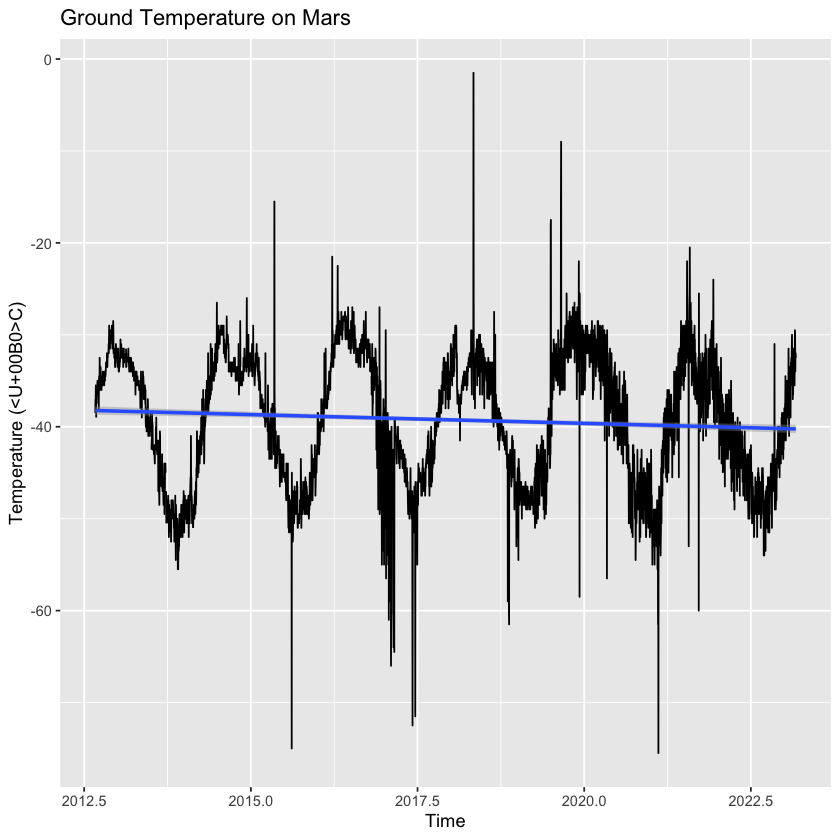

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


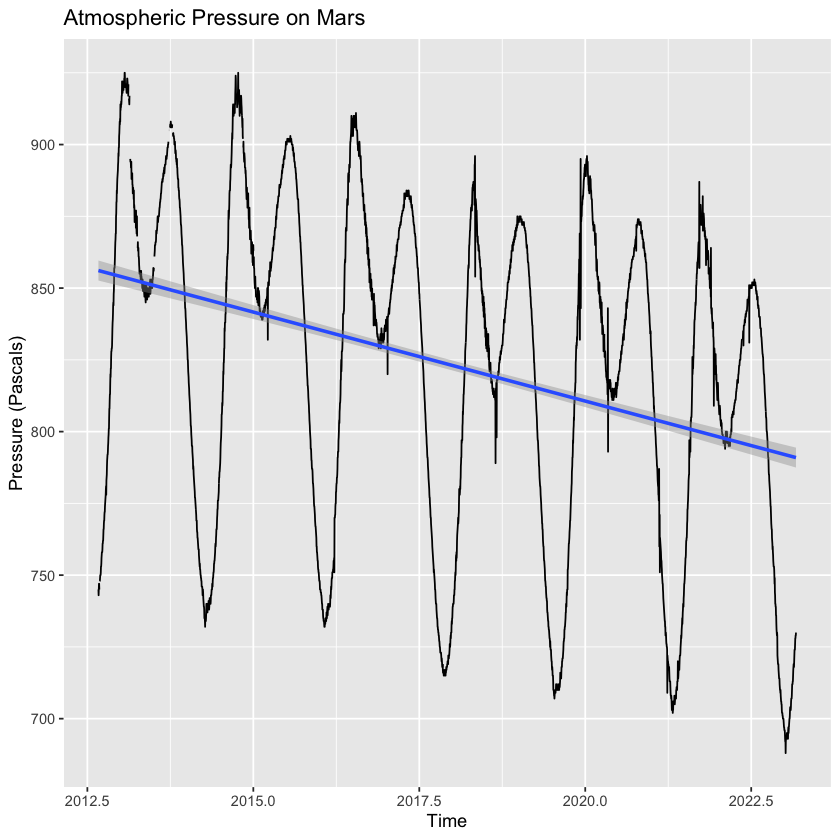

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


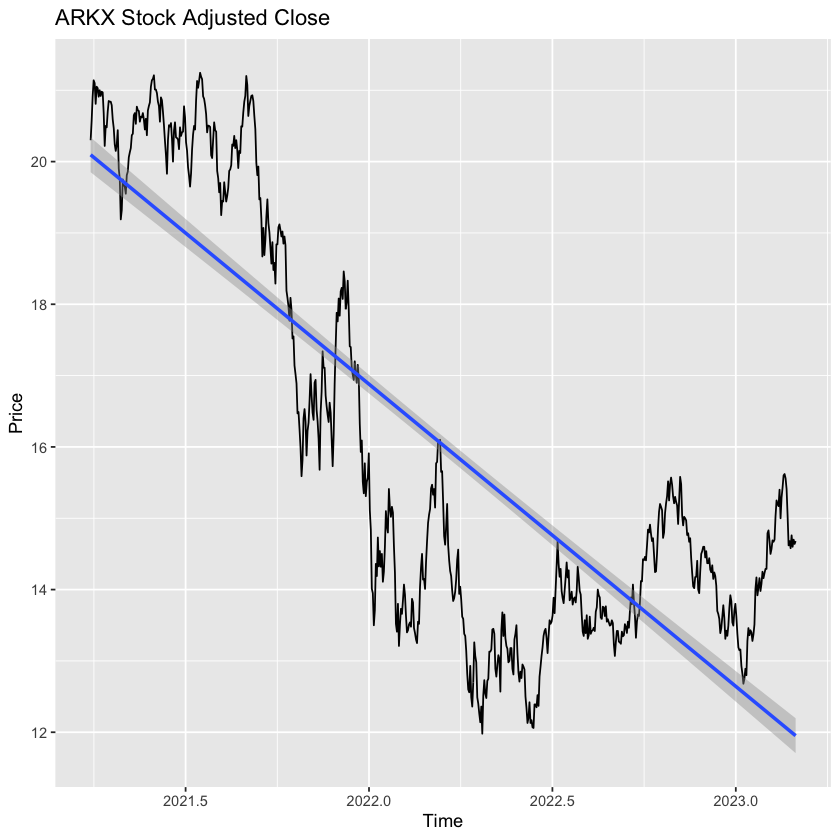

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


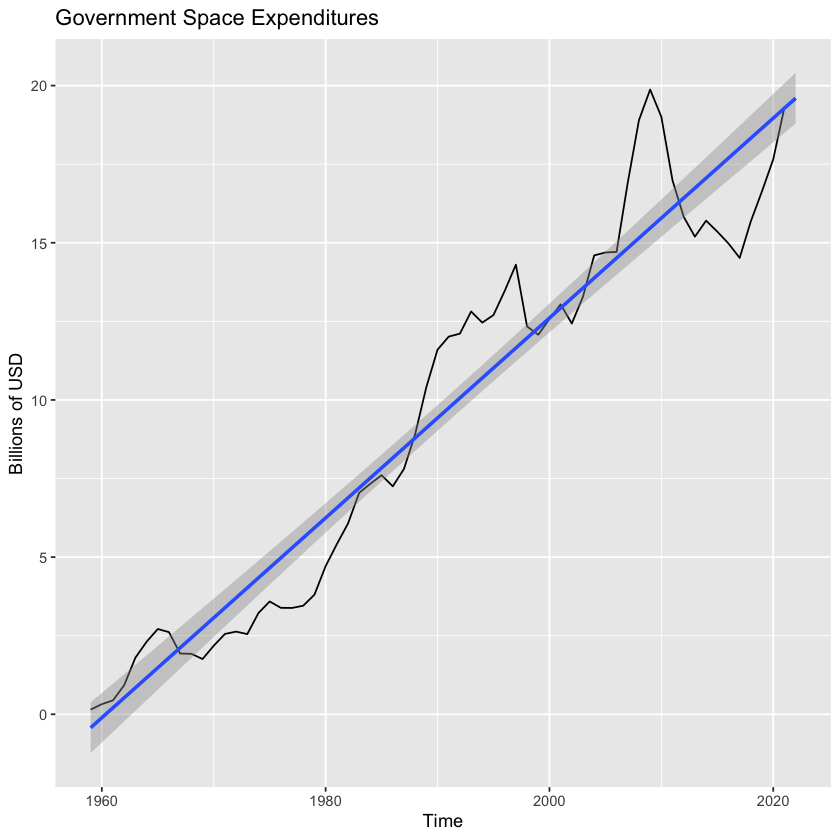

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


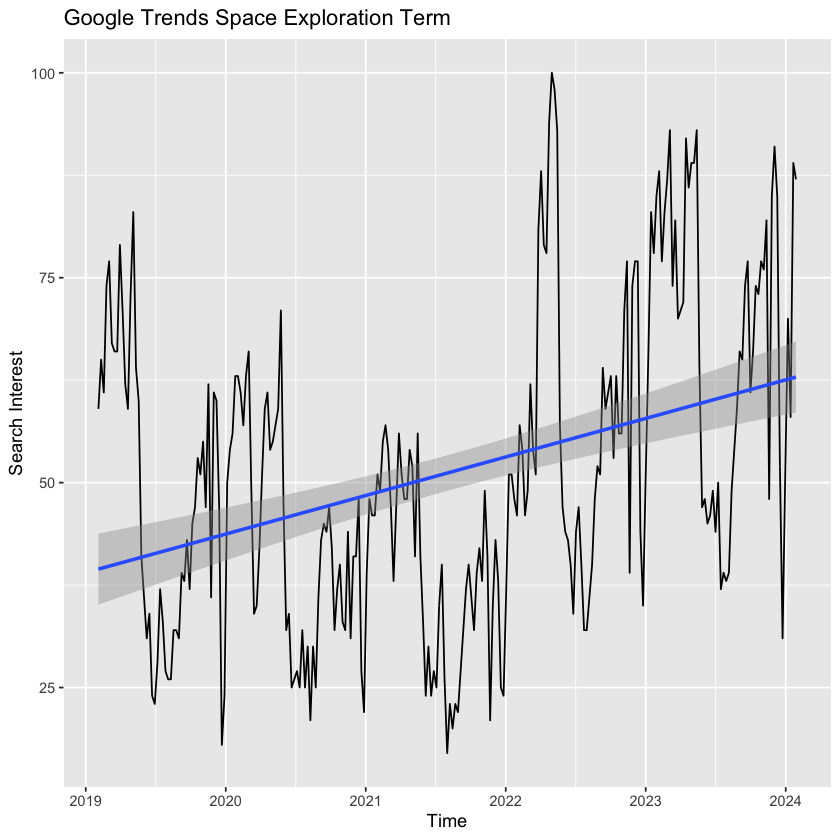

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


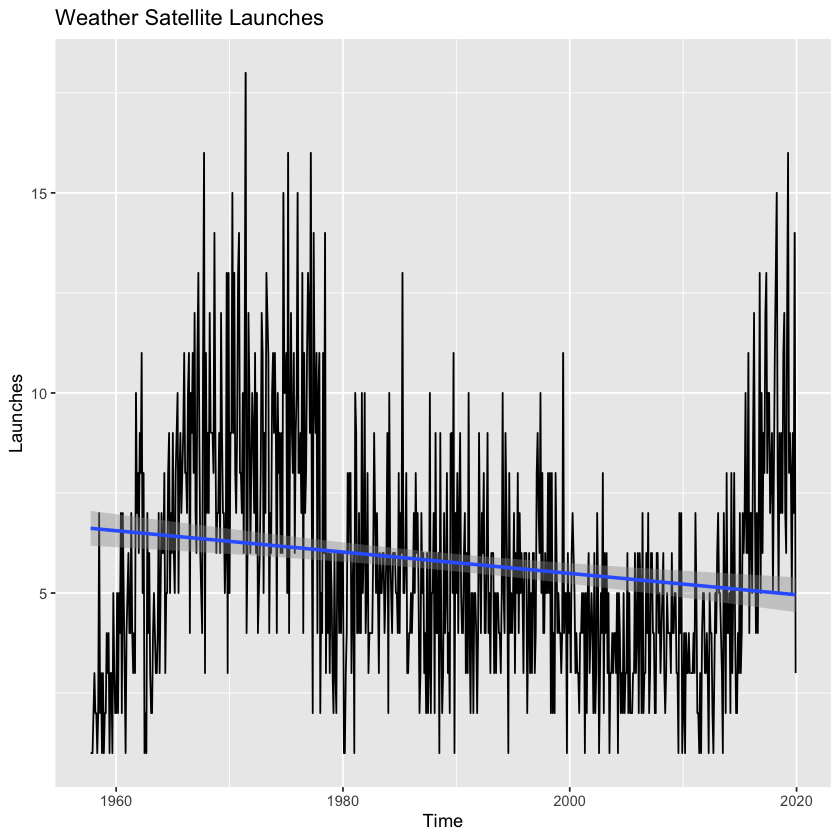

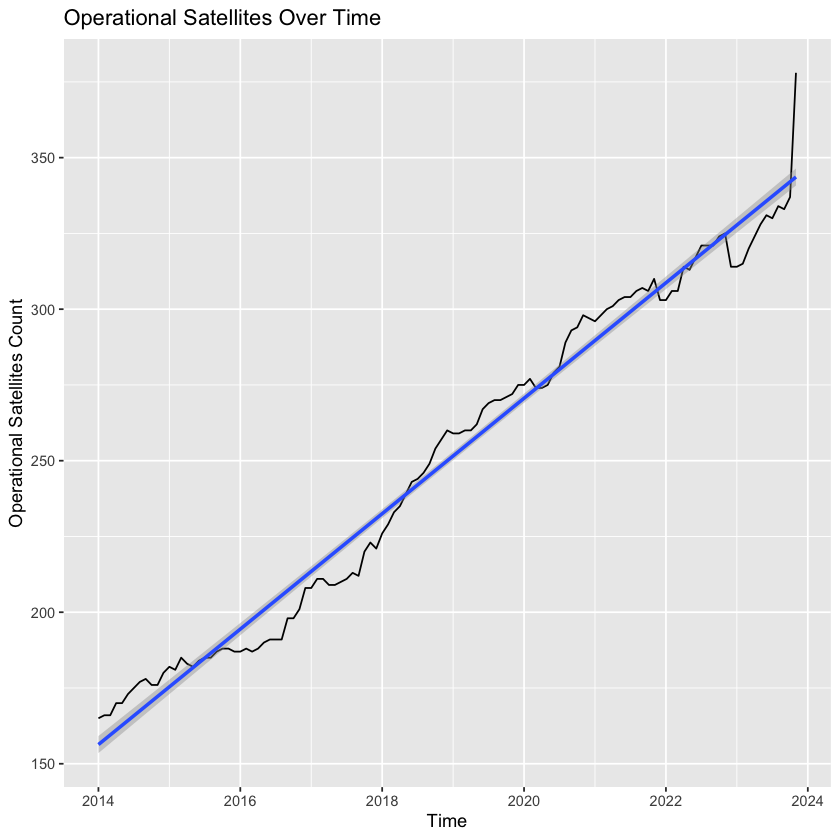

In [221]:

# plotting function
plot_ts <- function(ts_data, plot_title, y_label, filename_to_save) {
  x <- time(ts_data)
  y <- ts_data
  df_for_lot <- data.frame(x, y)
  
  ggp <- ggplot(df_for_lot, aes(x, y)) +
    
    geom_line() +
    
    stat_smooth(method = "lm", formula = y ~ x, geom = "smooth") +

    labs(x = "Time", y = y_label, fill = "Satellite Status", 
       title = plot_title) 

    theme_minimal(base_size = 16) + 
    theme(plot.title = element_text(size = 20), 
          axis.title = element_text(size = 18), 
          legend.title = element_text(size = 16), 
          legend.text = element_text(size = 14))

  

  filename <- paste0("../../docs_source/images/eda/original_", filename_to_save, "_status.jpeg")

  ggsave(filename, plot = ggp, width = 12, height = 8)

  print(ggp)
}



# loop
for (element in plot_elements) {
  plot_ts(element$ts, element$title, element$ylabel, element$filename_to_save)
}




